In [1]:
import models
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
import numpy as np
from sklearn.metrics import mean_squared_error

c:\Users\aruav\Desktop\Deepen\CTG\prototipe_app\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ipca = models.predict_ipca(True)
cambio = models.predict_cambio(True)
cdi = models.predict_cdi(True)
gsf = models.predict_gsf(True)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\aruav\Desktop\Deepen\CTG\prototipe_app\venv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting DataLoader 0: 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\aruav\Desktop\Deepen\CTG\prototipe_app\venv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]


## IPCA

<AxesSubplot: title={'center': 'Previsão IPCA'}, xlabel='Date'>

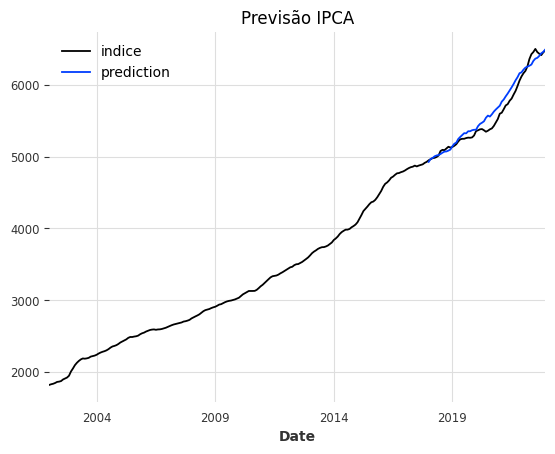

In [3]:
ipca[['indice','prediction']].plot(title = 'Previsão IPCA')

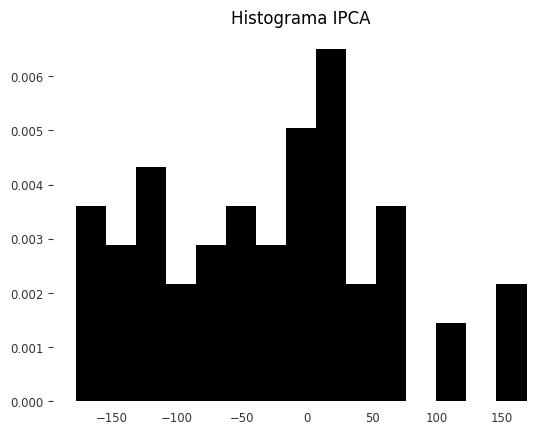

In [9]:
plt.hist(ipca['res'],15,density = True)
plt.title('Histograma IPCA')
plt.grid(False)
plt.show()

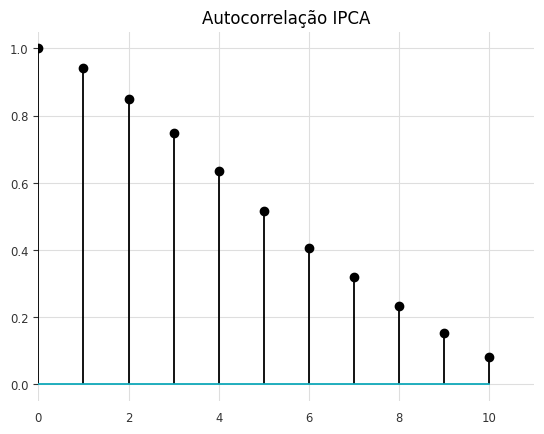

In [11]:
autocorr = acf(ipca['res'].dropna(),nlags = 10)
lg = range(0,11)
plt.stem(lg,autocorr)
plt.xlim([0,11])
plt.title('Autocorrelação IPCA')
plt.show()

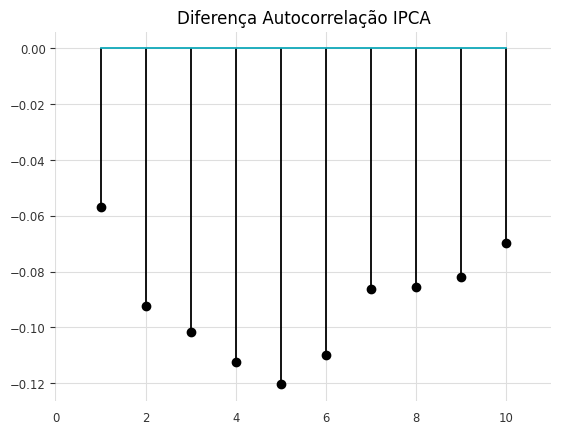

In [13]:
autocorr = np.diff(acf(ipca['res'].dropna(),nlags = 10))
lg = range(1,11)
plt.stem(lg,autocorr)
plt.xlim([0,11])
plt.title(f'Diferença Autocorrelação IPCA')
plt.show()

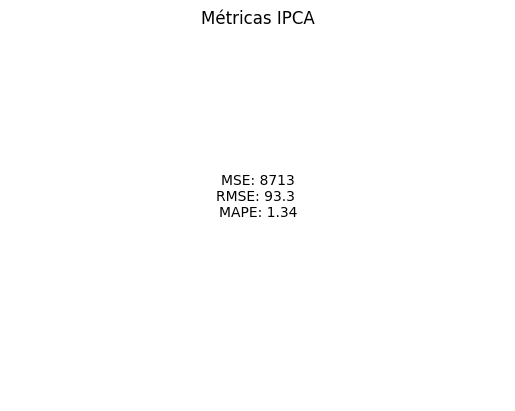

In [17]:
data = ipca.dropna()
mse = round(mean_squared_error(data['indice'],data['prediction']))
rmse = round(mean_squared_error(data['indice'],data['prediction'],squared = False),1)
mape = round(np.mean(np.abs((data['indice']- data['prediction'])/data['indice']))*100,2)
plt.text(0.5,0.5,f'MSE: {mse}\nRMSE: {rmse} \nMAPE: {mape}',ha = 'center')
plt.title('Métricas IPCA')
plt.grid(False)
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticklabels([])
plt.gca().xaxis.set_ticks_position('none') 
plt.gca().yaxis.set_ticks_position('none')
plt.show()

## CDI

<AxesSubplot: title={'center': 'Previsão CDI'}, xlabel='Date'>

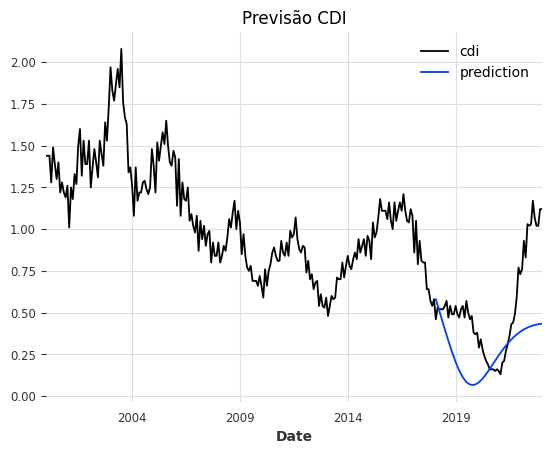

In [4]:
cdi[['cdi','prediction']].plot(title = 'Previsão CDI')

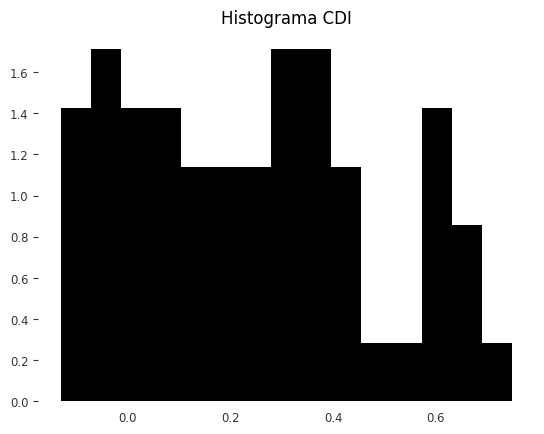

In [20]:
plt.hist(cdi['res'],15,density = True)
plt.title('Histograma CDI')
plt.grid(False)
plt.show()

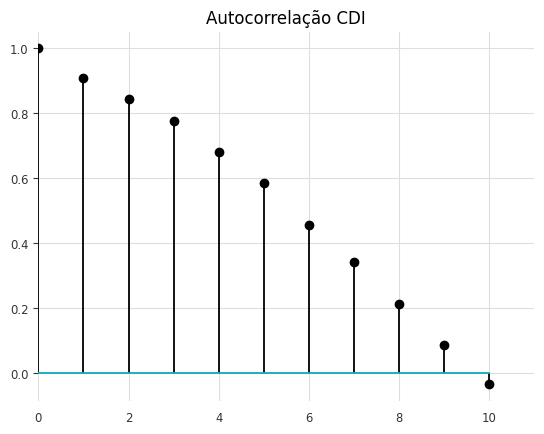

In [21]:
autocorr = acf(cdi['res'].dropna(),nlags = 10)
lg = range(0,11)
plt.stem(lg,autocorr)
plt.xlim([0,11])
plt.title('Autocorrelação CDI')
plt.show()

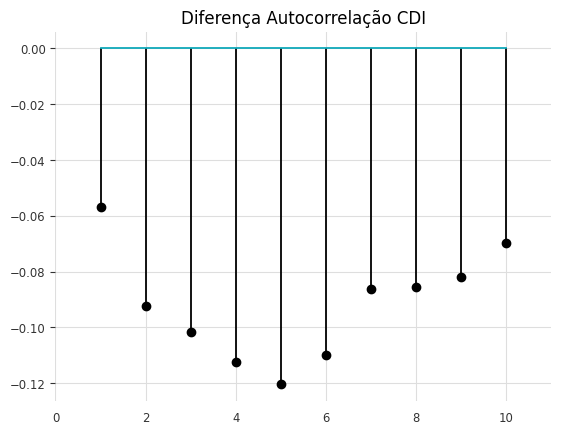

In [22]:
autocorr = np.diff(acf(ipca['res'].dropna(),nlags = 10))
lg = range(1,11)
plt.stem(lg,autocorr)
plt.xlim([0,11])
plt.title(f'Diferença Autocorrelação CDI')
plt.show()

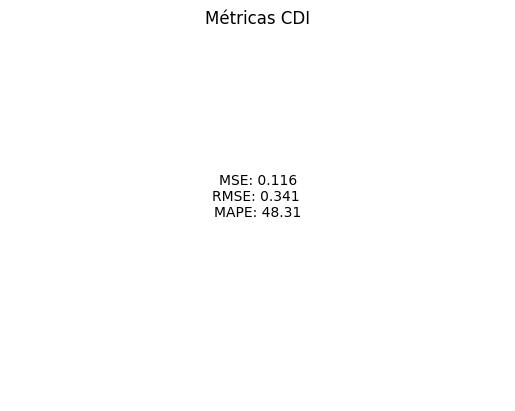

In [31]:
data = cdi.dropna()
mse = round(mean_squared_error(data['cdi'],data['prediction']),3)
rmse = round(mean_squared_error(data['cdi'],data['prediction'],squared = False),3)
mape = round(np.mean(np.abs((data['cdi']- data['prediction'])/data['cdi']))*100,2)
plt.text(0.5,0.5,f'MSE: {mse}\nRMSE: {rmse} \nMAPE: {mape}',ha = 'center')
plt.title('Métricas CDI')
plt.grid(False)
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticklabels([])
plt.gca().xaxis.set_ticks_position('none') 
plt.gca().yaxis.set_ticks_position('none')
plt.show()

## GSF

<AxesSubplot: title={'center': 'Previsão GSF'}, xlabel='index'>

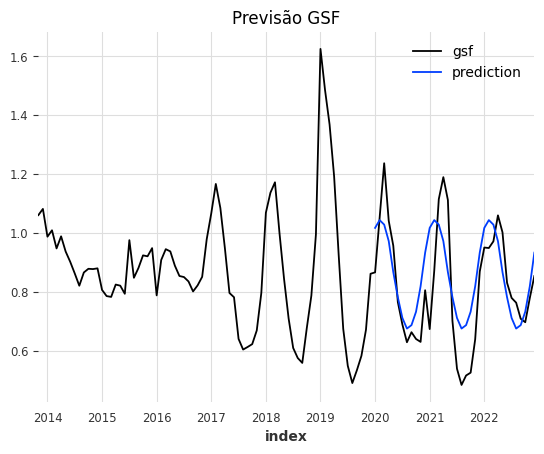

In [5]:
gsf[['gsf','prediction']].plot(title = 'Previsão GSF')

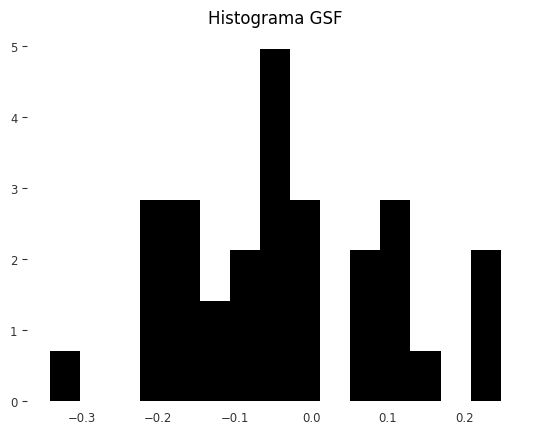

In [24]:
plt.hist(gsf['res'],15,density = True)
plt.title('Histograma GSF')
plt.grid(False)
plt.show()

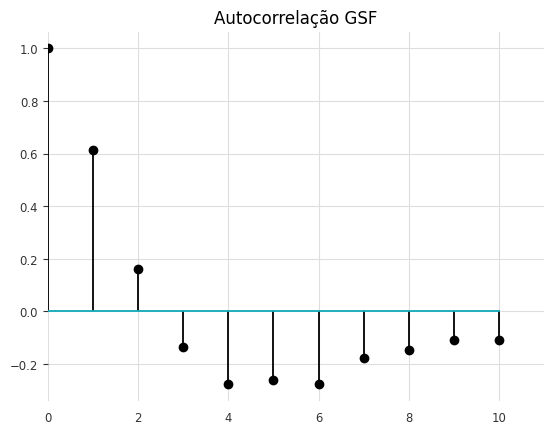

In [25]:
autocorr = acf(gsf['res'].dropna(),nlags = 10)
lg = range(0,11)
plt.stem(lg,autocorr)
plt.xlim([0,11])
plt.title('Autocorrelação GSF')
plt.show()

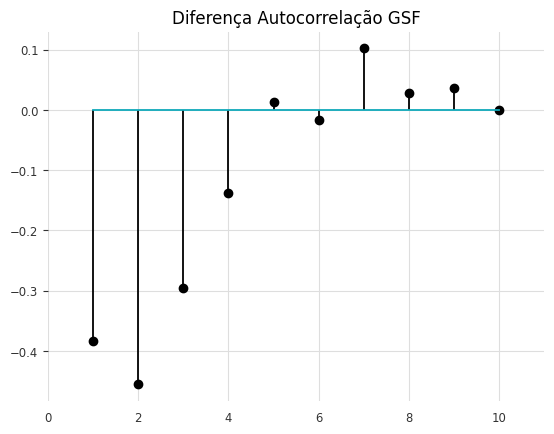

In [26]:
autocorr = np.diff(acf(gsf['res'].dropna(),nlags = 10))
lg = range(1,11)
plt.stem(lg,autocorr)
plt.xlim([0,11])
plt.title(f'Diferença Autocorrelação GSF')
plt.show()

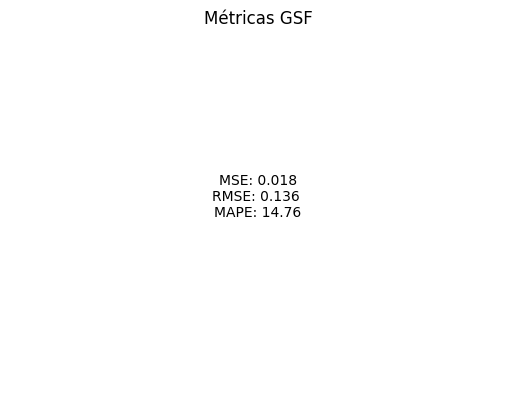

In [32]:
data = gsf.dropna()
mse = round(mean_squared_error(data['gsf'],data['prediction']),3)
rmse = round(mean_squared_error(data['gsf'],data['prediction'],squared = False),3)
mape = round(np.mean(np.abs((data['gsf']- data['prediction'])/data['gsf']))*100,2)
plt.text(0.5,0.5,f'MSE: {mse}\nRMSE: {rmse} \nMAPE: {mape}',ha = 'center')
plt.title('Métricas GSF')
plt.grid(False)
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticklabels([])
plt.gca().xaxis.set_ticks_position('none') 
plt.gca().yaxis.set_ticks_position('none')
plt.show()

## Câmbio

<AxesSubplot: xlabel='Date'>

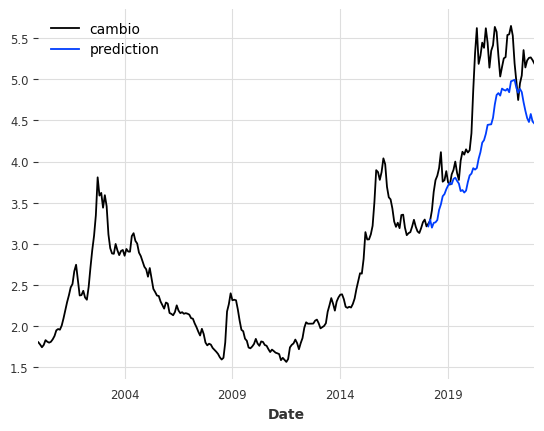

In [6]:
cambio[['cambio','prediction']].plot()

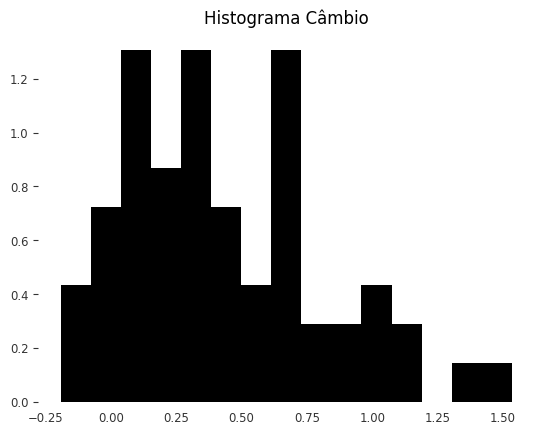

In [5]:
plt.hist(cambio['res'],15,density = True)
plt.title('Histograma Câmbio')
plt.grid(False)
plt.show()

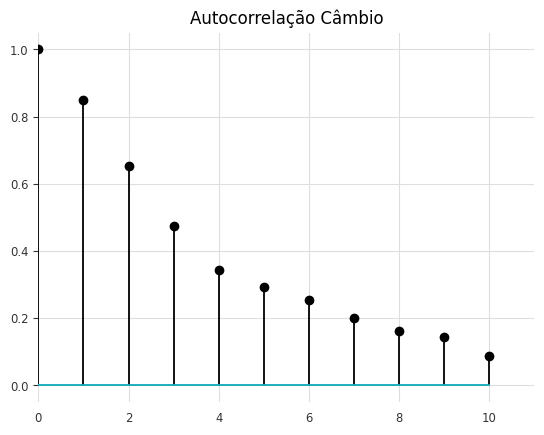

In [6]:
autocorr = acf(cambio['res'].dropna(),nlags = 10)
lg = range(0,11)
plt.stem(lg,autocorr)
plt.xlim([0,11])
plt.title('Autocorrelação Câmbio')
plt.show()

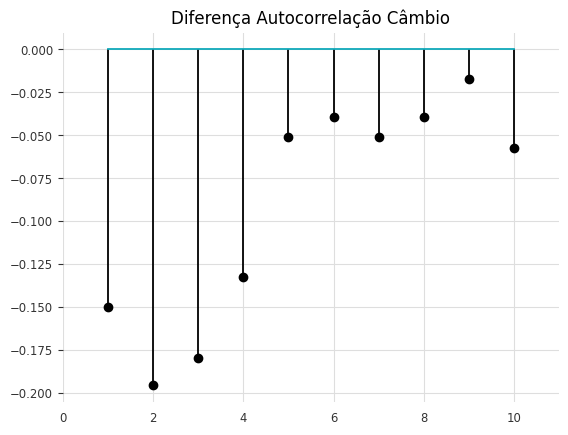

In [8]:
autocorr = np.diff(acf(cambio['res'].dropna(),nlags = 10))
lg = range(1,11)
plt.stem(lg,autocorr)
plt.xlim([0,11])
plt.title(f'Diferença Autocorrelação Câmbio')
plt.show()

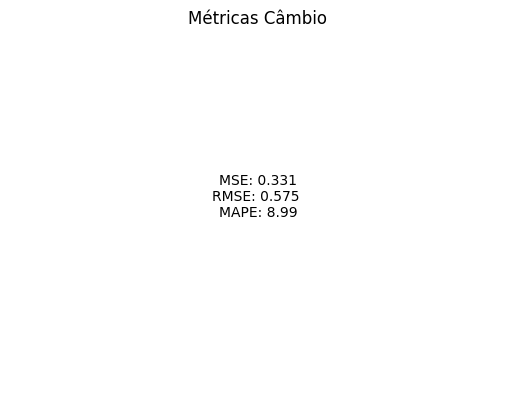

In [9]:
data = cambio.dropna()
mse = round(mean_squared_error(data['cambio'],data['prediction']),3)
rmse = round(mean_squared_error(data['cambio'],data['prediction'],squared = False),3)
mape = round(np.mean(np.abs((data['cambio']- data['prediction'])/data['cambio']))*100,2)
plt.text(0.5,0.5,f'MSE: {mse}\nRMSE: {rmse} \nMAPE: {mape}',ha = 'center')
plt.title('Métricas Câmbio')
plt.grid(False)
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticklabels([])
plt.gca().xaxis.set_ticks_position('none') 
plt.gca().yaxis.set_ticks_position('none')
plt.show()